In [1]:
import pandas as pd
import numpy as np
#from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd
import seaborn as sns

sales=pd.read_csv('data/raw/sales_train_validation.csv')
#weekly_sales=pd.read_csv('data/processed/weekly_sales.csv')
#monthly_sales=pd.read_csv('data/processed/monthly_sales.csv')

## Monthly cluster

In [2]:
#monthly_to_calc=monthly_sales.iloc[:,19:].astype(float).round(2)
#weekly_to_calc=weekly_sales.iloc[:,-60:].astype(float).round(2)  #starting where 80% of values are filled
daily_to_calc=sales.iloc[:,-90:].astype(float).round(2)

In [3]:
#corr_spearman_week = weekly_to_calc.T.corr(method='spearman')
#corr_spearman_week=corr_spearman_week.round(decimals=2)
#corr_spearman.to_csv('corr_spearman.csv',compression = 'gzip')
#corr_spearman=pd.read_csv('corr_spearman.csv', compression='gzip')
corr_daily=pd.read_pickle('corr_daily.pkl')

In [4]:
'''distances1 = corr_spearman_week.abs().values
for k in range(len(distances1)):
    distances1[k][k]=0
pd.DataFrame(distances1).to_pickle('distances_spear_week.pkl')'''
distances1=pd.read_pickle('distances_spear_week.pkl').fillna(0)
pd.DataFrame(distances1).to_pickle('distances_spear_week.pkl')

In [3]:
#corr_pearson_month = weekly_to_calc.T.corr(method='spearman')
#corr_pearson_month=corr_pearson_month.round(decimals=2)
#corr_spearman.to_csv('corr_spearman.csv',compression = 'gzip')
#corr_spearman=pd.read_csv('corr_spearman.csv', compression='gzip')
corr_daily=pd.read_pickle('corr_daily.pkl')

In [4]:
corr_daily = daily_to_calc.T.corr(method='pearson')
corr_daily.to_pickle('corr_daily_pearson.pkl')

In [6]:
'''distances2 = corr_pearson_month.abs().values
for k in range(len(distances2)):
    distances2[k][k]=0
pd.DataFrame(distances2).to_pickle('distances_pearson_month.pkl')'''
distances2=pd.read_pickle('distances_pearson_month.pkl').fillna(0)
pd.DataFrame(distances2).to_pickle('distances_pearson_month.pkl')


In [3]:
corr_pearson_day = daily_to_calc.T.corr(method='pearson')
corr_pearson_day=corr_pearson_day.round(decimals=2).fillna(0)
#corr_spearman.to_csv('corr_spearman.csv',compression = 'gzip')
#corr_spearman=pd.read_csv('corr_spearman.csv', compression='gzip')

In [4]:
distances3 = corr_pearson_day.values
#for k in range(len(distances3)):
#    distances3[k][k]=0
pd.DataFrame(distances3).to_pickle('distances_pearson_day.pkl')     #É ESSA!!
#distances3=pd.read_pickle('distances_pearson_day.pkl')

somar ambos e tal

In [5]:
distances3=1-distances3
for k in range(len(distances3)):
    distances3[k][k]=0

In [6]:
distArray=ssd.squareform(distances3)

In [7]:
hier = hierarchy.linkage(distArray, method="average") 

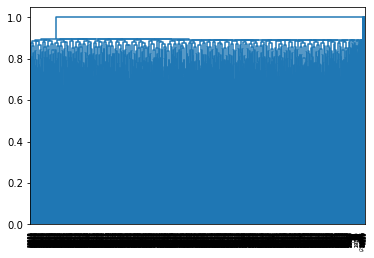

In [16]:
dend = hierarchy.dendrogram(hier, truncate_mode="level",color_threshold=0.5)

In [42]:
n_clusters=1000
cluster_labels = hierarchy.fcluster(hier, n_clusters, criterion="maxclust")

In [43]:
sales['cluster']=cluster_labels

In [44]:
sales['cluster'].nunique()

1000

In [45]:
cors=[]
for n in range(sales.iloc[:,-60:]['cluster'].nunique()):
    x =  sales.iloc[:,-60:][sales.iloc[:,-60:]['cluster']==n+1].drop(columns='cluster').corrwith(sales.iloc[:,-60:][sales.iloc[:,-60:]['cluster']==n+1].drop(columns='cluster').mean(),axis=1).mean()
    print('average correation is '+ str(x) + '   cluster size is: '+str(len(sales[sales['cluster']==n+1])))
    cors.append(x)
corr_med = np.mean([x for x in cors if str(x) != 'nan' and x != 1])
print('correlaçao media total = ' + str(corr_med))


average correation is 0.500265175901422   cluster size is: 14
average correation is 0.5225401691823803   cluster size is: 144
average correation is 0.47546754013588655   cluster size is: 16
average correation is 0.48291548532574247   cluster size is: 136
average correation is 0.5382728338357209   cluster size is: 7
average correation is 0.48118941467452825   cluster size is: 18
average correation is 0.3787844230617985   cluster size is: 23
average correation is 0.469151327540259   cluster size is: 9
average correation is 0.09258152501316794   cluster size is: 139
average correation is 0.5345925053020182   cluster size is: 14
average correation is 0.5186606659345048   cluster size is: 14
average correation is 0.5633423343106824   cluster size is: 12
average correation is 0.525709701495977   cluster size is: 149
average correation is 0.6782489604177402   cluster size is: 4
average correation is 0.5161969041045252   cluster size is: 13
average correation is 0.5340191755360684   cluster si

<ipython-input-46-65bd3469954a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.heatmap(sales[sales['cluster']<20][sales['cluster']!=10][sales['cluster']!=11].iloc[:,-50:].sort_values(by='cluster').drop(columns='cluster').T.corr())
<ipython-input-46-65bd3469954a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.heatmap(sales[sales['cluster']<20][sales['cluster']!=10][sales['cluster']!=11].iloc[:,-50:].sort_values(by='cluster').drop(columns='cluster').T.corr())


<AxesSubplot:>

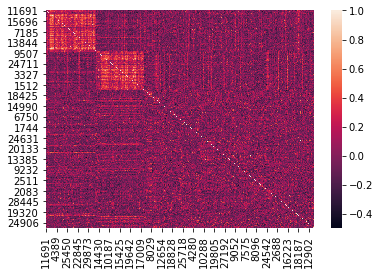

In [46]:
sns.heatmap(sales[sales['cluster']<20][sales['cluster']!=10][sales['cluster']!=11].iloc[:,-50:].sort_values(by='cluster').drop(columns='cluster').T.corr())

<ipython-input-47-136703a4737c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.heatmap(sales[sales['cluster']<20][sales['cluster']!=10][sales['cluster']!=11].iloc[:,-50:].drop(columns='cluster').T.corr())
<ipython-input-47-136703a4737c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.heatmap(sales[sales['cluster']<20][sales['cluster']!=10][sales['cluster']!=11].iloc[:,-50:].drop(columns='cluster').T.corr())


<AxesSubplot:>

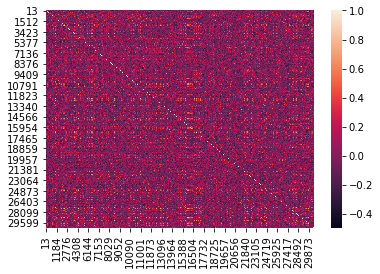

In [47]:
sns.heatmap(sales[sales['cluster']<20][sales['cluster']!=10][sales['cluster']!=11].iloc[:,-50:].drop(columns='cluster').T.corr())

In [49]:
sales[['id','cluster']].to_csv('cluster1000d.csv')